# Python for finance

### Defining Functions

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install datetime
!pip install mplfinance
!pip install pandas_datareader

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # styling dates


import datetime as dt
import mplfinance as mpf #matplotlib finance


The Pandas DataReader provides functions for loading data from various online sources, including Yahoo Finance and the NASDAQ. This can be incredibly helpful for tasks such as financial analysis, data visualization, and machine learning.

In [ ]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):

    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)


    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    # df.to_csv(ticker + '.csv')
    return df

In [ ]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):

    # Try to get the file and if it doesn't exist issue a warning
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv(ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [ ]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv(ticker + '.csv')
    return df

In [ ]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])

    # Use a mask to grab data between defined dates
    # You guys should look up what a mask is (this will count as part of your EC for HW3, use example)
    mask = (df['Date'] >= start) & (df['Date'] <= end)

    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()

    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

### Mask/Masking

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# compute the sum of elements smaller than 4 and larger than 6.
total = 0    # Variable to store the sum
for num in arr:
    if (num<4) or (num>6):
        total += num
print(total)

21


In [ ]:
total = sum([num for num in arr if (num<4) or (num>6)])
# we make of all the numbers and then sum
total

21

The same task can be achieved using the concept of Masking. It essentially works with a list of Booleans (True/False), which when applied to the original array returns the elements of interest. Here, True refers to the elements that satisfy the condition (smaller than 4 and larger than 6 in our case), and False refers to the elements that do not satisfy the condition.

Let us first create this mask manually.

In [ ]:
mask = [True, True, True, False, False, False, True, True]

In [ ]:
arr[mask]

array([1, 2, 3, 7, 8])

In [ ]:
arr[mask].sum()

21

Numpy offers an in-built MaskedArray module called ma. The masked_array() function of this module allows you to directly create a "masked array" in which the elements not fulfilling the condition will be rendered/labeled "invalid". This is achieved using the mask argument, which contains True/False or values 0/1.

Numpy offers an in-built MaskedArray module called ma. The masked_array() function of this module allows you to directly create a "masked array" in which the elements not fulfilling the condition will be rendered/labeled "invalid". This is achieved using the mask argument, which contains True/False or values 0/1.


WHEN YOU USE MASK ARRAY YOU MARK THEM AS OPPOSITE

FALSE VALUES FOR THINGS YOU WANT TO KEEP, TRUE VALUES FOR THINGS YOU WANT TO GET RID OF

In [ ]:
from numpy.ma.core import masked_array
import numpy.ma as ma

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ma_arr = ma.masked_array(arr, mask=[False, False, False, True, True, True, False, False])


ma_arr


masked_array(data=[1, 2, 3, --, --, --, 7, 8],
             mask=[False, False, False,  True,  True,  True, False, False],
       fill_value=999999)

In [ ]:
ma_arr.sum()

21

In [ ]:
"""Using Tilde operator to reverse the Boolean"""

ma_arr2 = ma.masked_array(arr, mask=[~((a<4) or (a>6)) for a in arr])

ma_arr2.sum()

21

Notes after class topics

In [ ]:
ma_arr2 = ma.masked_array(arr, mask=[0, 0, 0, 1, 1, 1, 0, 0])

Depending on the type of masking condition, NumPy offers several other in-built masks that avoid your manual task of specifying the Boolean mask. Few such conditions are:

* less than (or less than equal to) a number
* greater than (or greater than equal to) a number
* within a given range
* outside a given range

In [ ]:
arr2 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
ma_arr4 = ma.masked_less(arr2, 4)
ma_arr4.sum()


In [ ]:
ma_arr5 = ma.masked_greater(arr2, 4)
ma_arr5.sum()


In [ ]:
ma_arr6 = ma.masked_greater_equal(arr2, 4)


In [ ]:
ma_arr7 = ma.masked_inside(arr2, 4, 6)
ma_arr7.sum()

In [ ]:
ma_arr8 = ma.masked_outside(arr2, 4, 6)
ma_arr8.sum()

In [ ]:
arr3 = np.array([1, 2, 3, np.nan, 5, 6, np.inf, 8])
arr3.sum()

In [ ]:
ma_arr9 = ma.masked_invalid(arr3)
ma_arr9.mean()

In [ ]:
arr4 = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

In [ ]:
ma_arr10 = ma.masked_array(arr4, mask=[[0, 0, 0],
                                    [0, 1, 1],
                                    [1, 1, 1]])


In [ ]:
ma_arr10 = ma.masked_greater(arr4, 4)
ma_arr10.sum(axis=0)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
correlation = df.corr()
ax = sns.heatmap(data=correlation, cmap='coolwarm',
                 linewidths=2, cbar=True)

In [ ]:
correlation = df.corr()
"""Create a mask for abs(corr) > 0.7"""
corr_masked = ma.masked_outside(np.array(correlation), -0.7, 0.7)
"""Set gold color for the masked/bad values"""
cmap = plt.get_cmap('coolwarm')
cmap.set_bad('gold')
ax = sns.heatmap(data=correlation, cmap=cmap,
                 mask=corr_masked.mask,
                 linewidths=2, cbar=True)

### Back to finance


In [ ]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv(ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:

        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])

        # Define to only use data between provided dates
        df_sub = df.loc[start:end]

        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)

        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s)
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1)
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

In [ ]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv(ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:

        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])

        # Define to only use data between provided dates
        df_sub = df.loc[start:end]

        # Convert to Numpy array
        df_np = df_sub.to_numpy()

        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]

        # Get date from the 1st
        date_arr = df_np[:,1]

        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])

        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')

        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))

        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))

        # Set grid background color
        axes.set_facecolor('#FAEBD7')

In [ ]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [ ]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]

    return mult_df

In [ ]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [ ]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [ ]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [ ]:
AMZN = save_to_csv_from_yahoo("AMZN",2020,1,1,2021,1,1)
# call to read the data from yahoo into a csv which works easily with mybinder python notebooks

In [ ]:
# Retrieve data from the CSV file
AMZN = get_df_from_csv('AMZN')


File Doesn't Exist


In [ ]:
start = datetime(2020, 1, 1)
end = datetime(2021, 1, 1)

df = web.DataReader("AMZN", 'yahoo', start, end)

In [ ]:
import yfinance as yf


amzn_data  = yf.download("AMZN", start='2020-01-01', end='2021-01-01', progress=False)

In [ ]:
amzn_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000
...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000


In [ ]:
amzn_data2 = amzn_data


amzn_data2['daily_return'] = (amzn_data2['Adj Close'] / amzn_data2['Adj Close'].shift(1)) - 1

In [ ]:
amzn_data2

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,-0.007809
...,...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,-0.003949
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,0.035071
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,0.011584


In [ ]:
amzn_data

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,-0.007809
...,...,...,...,...,...,...,...
2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,-0.003949
2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,0.035071
2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,0.011584


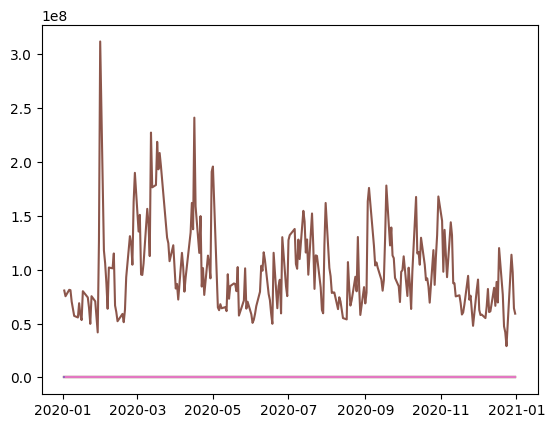

In [ ]:
plt.plot(amzn_data2)

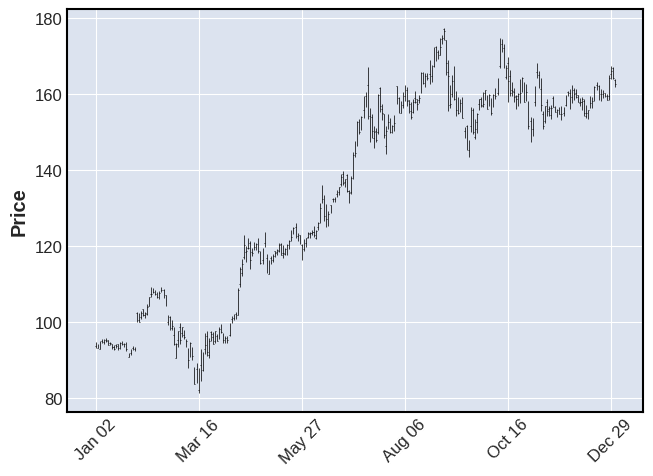

In [ ]:
mpf.plot(amzn_data2)

In [ ]:
start

datetime.datetime(2020, 1, 1, 0, 0)

In [ ]:
AMZN #wanted to seee the df
# Why are there only 253 rows
# stock prices arent collected on weekends
# it is really important to know how your data is collected and why

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,0,2020-01-02,94.900497,93.207497,93.750000,94.900497,80580000,94.900497,NaN
1,1,2020-01-03,94.309998,93.224998,93.224998,93.748497,75288000,93.748497,-0.012139
2,2,2020-01-06,95.184502,93.000000,93.000000,95.143997,81236000,95.143997,0.014886
3,3,2020-01-07,95.694504,94.601997,95.224998,95.343002,80898000,95.343002,0.002092
4,4,2020-01-08,95.550003,94.321999,94.902000,94.598503,70160000,94.598503,-0.007809
...,...,...,...,...,...,...,...,...,...
248,248,2020-12-24,160.100006,158.449997,159.695007,158.634506,29038000,158.634506,-0.003949
249,249,2020-12-28,165.199997,158.634506,159.699997,164.197998,113736000,164.197998,0.035071
250,250,2020-12-29,167.532501,164.061005,165.496994,166.100006,97458000,166.100006,0.011584
251,251,2020-12-30,167.104996,164.123505,167.050003,164.292496,64186000,164.292496,-0.010882


In [ ]:
# Add daily return to function
add_daily_return_to_df(AMZN, 'AMZN')
# all this does is add another feature to our amazon dataframe showing price over a year
# You see daily return has some NaN elements
# How do i eliminate those?? (This will count for EC)

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2020-01-02,94.900497,93.207497,93.750000,94.900497,80580000,94.900497,NaN
1,2020-01-03,94.309998,93.224998,93.224998,93.748497,75288000,93.748497,-0.012139
2,2020-01-06,95.184502,93.000000,93.000000,95.143997,81236000,95.143997,0.014886
3,2020-01-07,95.694504,94.601997,95.224998,95.343002,80898000,95.343002,0.002092
4,2020-01-08,95.550003,94.321999,94.902000,94.598503,70160000,94.598503,-0.007809
...,...,...,...,...,...,...,...,...
248,2020-12-24,160.100006,158.449997,159.695007,158.634506,29038000,158.634506,-0.003949
249,2020-12-28,165.199997,158.634506,159.699997,164.197998,113736000,164.197998,0.035071
250,2020-12-29,167.532501,164.061005,165.496994,166.100006,97458000,166.100006,0.011584
251,2020-12-30,167.104996,164.123505,167.050003,164.292496,64186000,164.292496,-0.010882


In [ ]:
# Get total return between dates
# Not adding a featuring this is showing how much money you made
# Not exactly sure on how useful this number is or what its used for
# but thats part of the work to figure that out

tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

Total Return : 0.6166402116980415


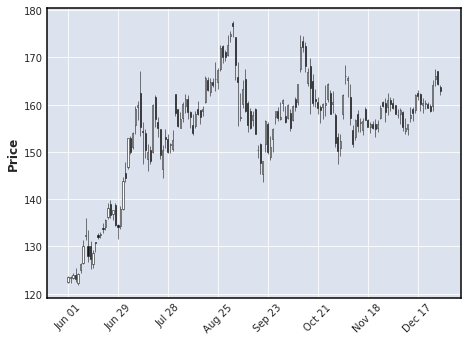

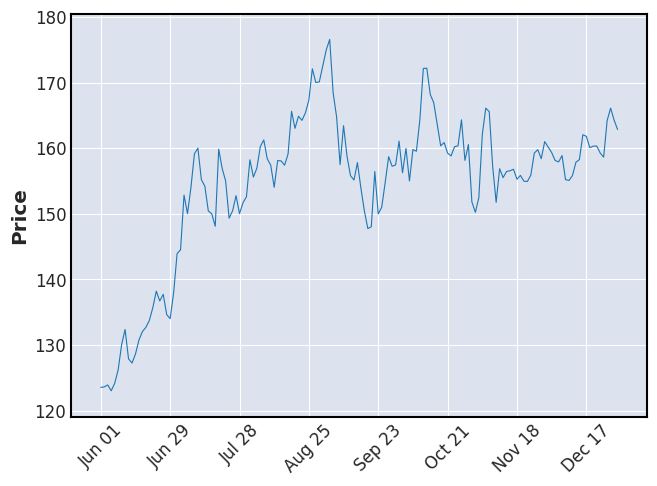

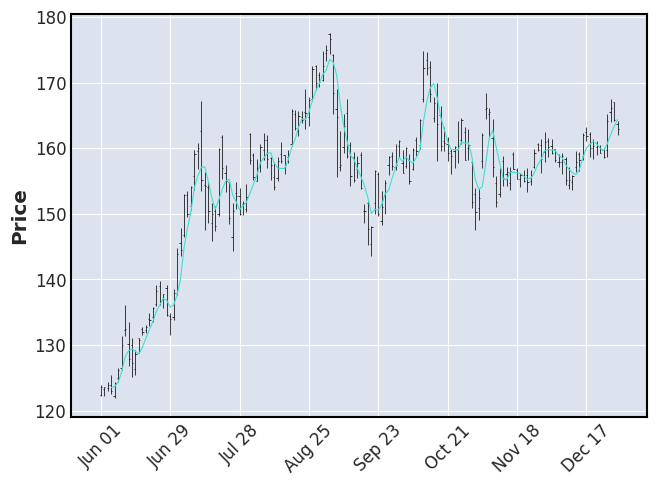

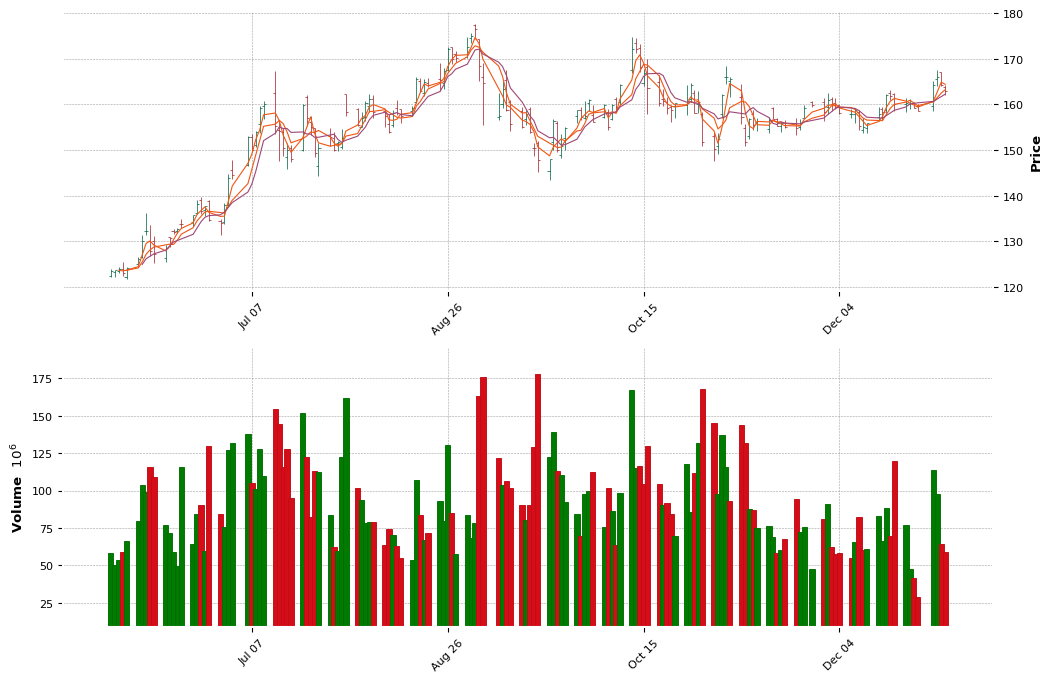

In [ ]:
# Use Matplotlib finance to print multiple charts
mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)




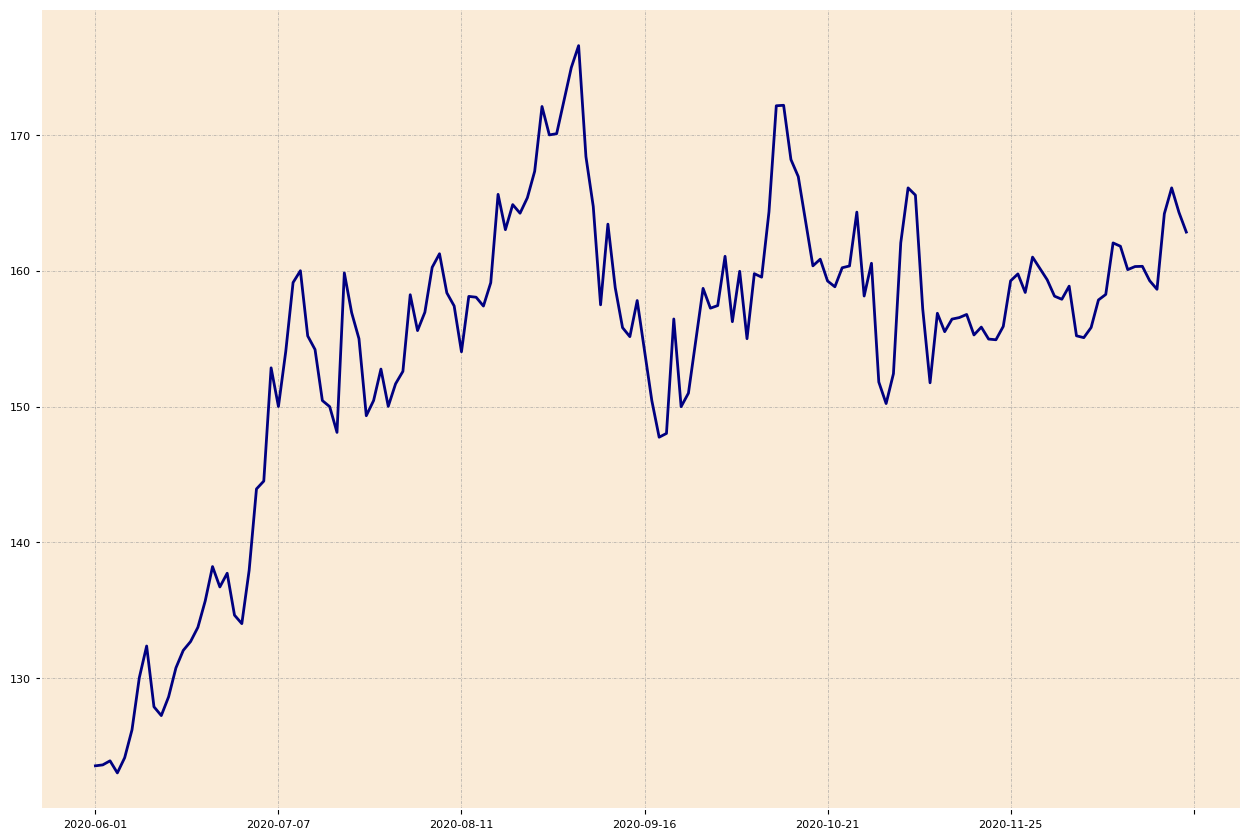

In [ ]:
price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

In [ ]:
# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG", "META"]
download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)
# keyword, named, default, multiple args lesson for functions

In [ ]:
META = get_df_from_csv('META')


In [ ]:
META

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
1,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
3,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
4,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001
...,...,...,...,...,...,...,...
248,2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
249,2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
250,2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999
251,2020-12-30,278.079987,271.709991,277.950012,271.869995,11803800,271.869995


In [ ]:
META = get_df_from_csv('META')

In [ ]:
# read the rest of the tickers into the get_df_from_csv

In [ ]:
# these are all the test functions I was going to give you
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
AMZN = save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)

# Retrieve data from the CSV file
AMZN = get_df_from_csv('AMZN')

# Add daily return to function
add_daily_return_to_df(AMZN, 'AMZN')

# Get total return between dates
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

# Use Matplotlib finance to print multiple charts
# mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

# Merge dataframes from multiple stocks using the same column name
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
mult_df = merge_df_by_column_name('Adj Close',  2020, 1, 1, 2021, 1, 1, *tickers)
mult_df.tail()

# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, mult_df)

# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df

# It is hard to compare stocks by standard deviation when their stock prices
# are so different. The coefficient of variation is the ratio between the
# standard deviation and the mean and it provides a comparable standard deviation
# We get it by dividing the standard deviation by the mean cov = std / mean
# We see here that GOOG has the least amount of variability